## Imports

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Constants

In [8]:
num_cities=10
population_size=100
generations=1000

## individual

In [9]:
class Individual:
    def __init__(self, genotype=None, num_cities=None, distance_matrix=None):
        if genotype is not None:
            self.genotype = genotype
        else:
            self.genotype = random.sample(range(num_cities), num_cities)  # Random tour
        self.fitness = calculate_fitness(self.genotype, distance_matrix)


## fitness

In [10]:

# Distance matrix representing the distances between cities
def generate_distance_matrix(num_cities):
    """Generate a random symmetric distance matrix for cities."""
    coordinates = np.random.rand(num_cities, 2) * 100  # Random cities in a 100x100 grid
    distance_matrix = np.linalg.norm(coordinates[:, np.newaxis] - coordinates, axis=2)
    return distance_matrix, coordinates



# Fitness function: Calculate the total distance of the tour
def calculate_fitness(tour, distance_matrix):
    """Calculate the total distance of the tour."""
    total_distance = sum(distance_matrix[tour[i - 1], tour[i]] for i in range(len(tour)))
    return total_distance


## operators

In [11]:

def mutate(individual, distance_matrix):
    """Mutation: Randomly swap two cities in the tour."""
    a, b = random.sample(range(len(individual.genotype)), 2)
    individual.genotype[a], individual.genotype[b] = individual.genotype[b], individual.genotype[a]
    individual.fitness = calculate_fitness(individual.genotype, distance_matrix)

def crossover(parent1, parent2, distance_matrix):
    """Partially Matched Crossover (PMX) for TSP."""
    size = len(parent1.genotype)
    p1, p2 = [0] * size, [0] * size

    # Choose random range for crossover
    start, stop = sorted(random.sample(range(size), 2))
    
    child1 = parent1.genotype[:]
    child2 = parent2.genotype[:]

    # Perform crossover between start and stop indices
    for i in range(start, stop):
        child1[i], child2[i] = child2[i], child1[i]

        p1[child1[i]], p2[child2[i]] = child1[i], child2[i]

    return Individual(genotype=child1, distance_matrix=distance_matrix), Individual(genotype=child2, distance_matrix=distance_matrix)


## Selection mechansims

In [12]:
def select_parents(population, k=5):
    """Tournament selection: Select k random individuals and return the best 2."""
    selected = random.sample(population, k)
    selected.sort(key=lambda x: x.fitness)
    return selected[:2]

def replace_weakest(population, offspring1, offspring2):
    """Replace two weakest individuals in the population if offspring are better."""
    population.sort(key=lambda x: x.fitness, reverse=True)
    population[-1] = offspring1
    population[-2] = offspring2

def sample_population(population, n):
    """Randomly sample n individuals from the population."""
    return random.sample(population, n)


## other

In [13]:
def plot_tour(tour, coordinates, title="TSP Solution"):
    """Plot the tour on a 2D graph."""
    plt.figure(figsize=(6, 6))
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue')
    for i, city in enumerate(tour):
        plt.text(coordinates[city, 0], coordinates[city, 1], f"{city}")
    tour_path = coordinates[tour + [tour[0]]]  # Add return to start
    plt.plot(tour_path[:, 0], tour_path[:, 1], 'r-')
    plt.title(title)
    plt.show()

def plot_fitness_evolution(fitness_history):
    """Plot the fitness evolution over generations."""
    plt.plot(fitness_history)
    plt.title("Fitness Evolution")
    plt.xlabel("Generation")
    plt.ylabel("Total Distance (Fitness)")
    plt.show()


In [15]:
# Initialize population
distance_matrix, coordinates = generate_distance_matrix(num_cities)
fitness_history = []
population = [Individual(num_cities=num_cities, distance_matrix=distance_matrix) for _ in range(population_size)]


Generation 0: Best fitness 924.4106503557771
Generation 100: Best fitness 1120.4596567057247
Generation 200: Best fitness 1147.7697257595646
Generation 300: Best fitness 1238.7949076532225
Generation 400: Best fitness 1105.7265043499647


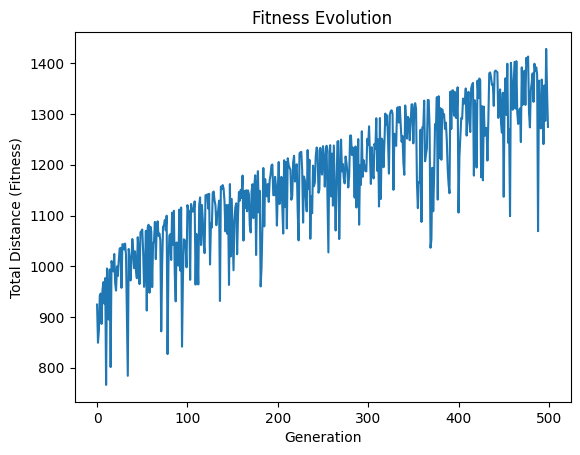

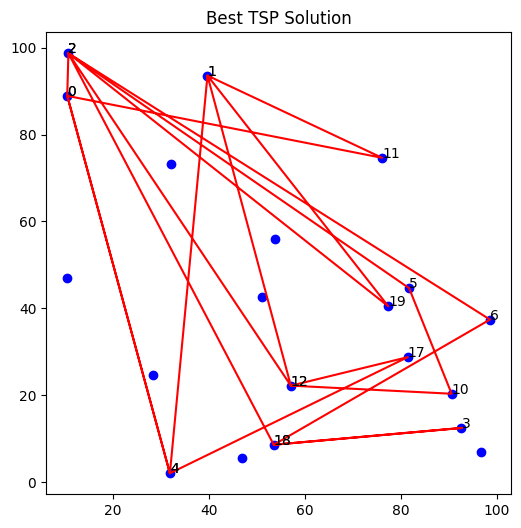

In [1]:


for gen in range(generations):
    # Select parents
    parent1, parent2 = select_parents(population)

    # Create offspring through crossover
    offspring1, offspring2 = crossover(parent1, parent2, distance_matrix)

    # Mutate the offspring
    if random.random() < 0.1:  # Mutation probability
        mutate(offspring1, distance_matrix)
    if random.random() < 0.1:
        mutate(offspring2, distance_matrix)

    # Replace the weakest individuals with the new offspring
    replace_weakest(population, offspring1, offspring2)

    # Record the fitness of the best individual
    best_individual = min(population, key=lambda x: x.fitness)
    fitness_history.append(best_individual.fitness)

    # Stop if solution converges (optional)
    if gen % 100 == 0:
        print(f"Generation {gen}: Best fitness {best_individual.fitness}")

    # Plot fitness evolution
    plot_fitness_evolution(fitness_history)

    # Plot the best tour
    best_individual = min(population, key=lambda x: x.fitness)
    plot_tour(best_individual.genotype, coordinates, title="Best TSP Solution")

# Run the genetic algorithm for TSP
tsp_genetic_algorithm(num_cities=20, population_size=100, generations=500)
